In [133]:
import pandas as pd
import numpy as np
import japanize_matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns
from datetime import datetime

pd.set_option('max_columns', 12)
plt.style.use('seaborn')

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'Noto Sans CJK JP']

In [134]:
time_series_confirmed = pd.read_csv('time_series_covid19_confirmed_global.csv')
time_series_deaths = pd.read_csv('time_series_covid19_deaths_global.csv')
time_series_recovered = pd.read_csv('time_series_covid19_recovered_global.csv')

In [135]:
time_series_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,...,110,110,120,170,174,237
1,NaN,Albania,41.1533,20.1683,0,0,...,186,197,212,223,243,259
2,NaN,Algeria,28.0339,1.6596,0,0,...,409,454,511,584,716,847
3,NaN,Andorra,42.5063,1.5218,0,0,...,267,308,334,370,376,390
4,NaN,Angola,-11.2027,17.8739,0,0,...,4,5,7,7,7,8


In [136]:
time_series_confirmed = (
    time_series_confirmed[time_series_confirmed['Country/Region']=='Japan']
    .drop(['Lat','Long','Province/State'], axis=1)
)
time_series_confirmed

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20
139,Japan,2,2,2,2,4,...,1468,1693,1866,1866,1953,2178


In [137]:
time_series_confirmed = (
    #Country/Regionを行に
    time_series_confermed.pivot(columns='Country/Region') 
    .T #転置
    .reset_index() #インデックスを解除
    .rename(columns={139:'累計患者数','level_0':'日付'}) #列名変更
)

#日付をTimestamp型に
time_series_confirmed['日付'] = pd.to_datetime(time_series_confirmed['日付'])
time_series_confirmed.tail() #末尾（直近5日）

,日付,Country/Region,累計患者数
66,2020-03-28,Japan,1693
67,2020-03-29,Japan,1866
68,2020-03-30,Japan,1866
69,2020-03-31,Japan,1953
70,2020-04-01,Japan,2178


In [138]:
time_series_deaths = (
    time_series_deaths[time_series_deaths['Country/Region']=='Japan']
    .drop(['Lat','Long','Province/State'], axis=1)
)

time_series_deaths = (
    time_series_deaths.pivot(columns='Country/Region')
    .T
    .reset_index()
    .rename(columns={139:'累計死亡者数','level_0':'日付'})
)
time_series_deaths['日付'] = pd.to_datetime(time_series_deaths['日付'])
time_series_deaths.head()

,日付,Country/Region,累計死亡者数
0,2020-01-22,Japan,0
1,2020-01-23,Japan,0
2,2020-01-24,Japan,0
3,2020-01-25,Japan,0
4,2020-01-26,Japan,0


In [139]:
time_series_recovered = (
    time_series_recovered[time_series_recovered['Country/Region']=='Japan']
    .drop(['Lat','Long','Province/State'], axis=1)
)

time_series_recovered = (
    time_series_recovered.pivot(columns='Country/Region')
    .T
    .reset_index()
    .rename(columns={133:'累計回復者数','level_0':'日付'})
)
time_series_recovered['日付'] = pd.to_datetime(time_series_recovered['日付'])
time_series_recovered.tail()

,日付,Country/Region,累計回復者数
66,2020-03-28,Japan,404
67,2020-03-29,Japan,424
68,2020-03-30,Japan,424
69,2020-03-31,Japan,424
70,2020-04-01,Japan,472


In [140]:
japan_covid = (
    time_series_confirmed
    .merge(time_series_recovered[['日付','累計回復者数']], 
           how='left',
           on='日付')
)

japan_covid = (
    japan_covid
    .merge(time_series_deaths[['日付','累計死亡者数']],
           how='left', 
           on='日付')
)

japan_covid = japan_covid.drop('Country/Region', axis=1)
japan_covid.set_index('日付', inplace=True)
japan_covid.tail()

,累計患者数,累計回復者数,累計死亡者数
日付,,,
2020-03-28,1693,404,52
2020-03-29,1866,424,54
2020-03-30,1866,424,54
2020-03-31,1953,424,56
2020-04-01,2178,472,57


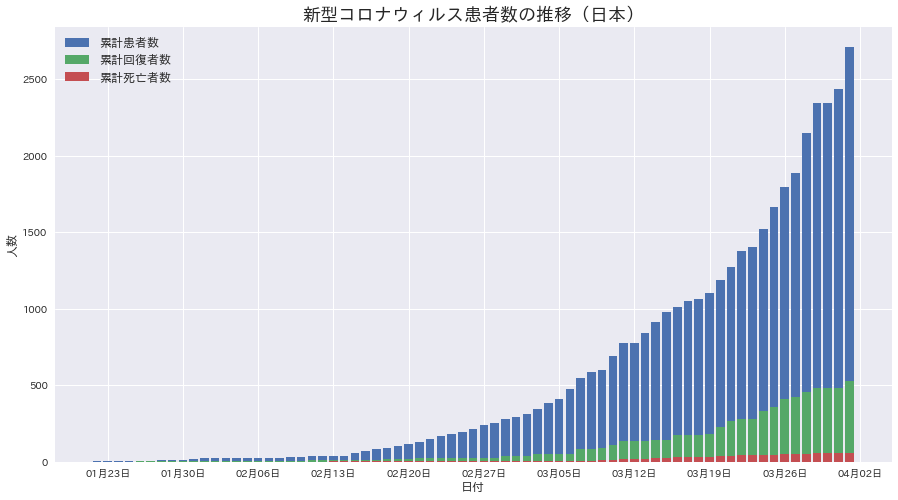

In [71]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

x, cols = japan_covid.index, len(japan_covid.columns)

#列ごとに（横方向に）和をとる
for i, t in enumerate(japan_covid.columns):
    y = japan_covid.iloc[:,i:cols].sum(axis=1)
    ax.bar(x, y, label=t)

#7日ごとに日付を表示
ax.xaxis.set_major_locator(dates.DayLocator(bymonthday=None, interval=7, tz=None))
ax.xaxis.set_major_formatter(dates.DateFormatter("%m月%d日"))

#タイトル、軸ラベルの設定
ax.set_title('新型コロナウィルス患者数の推移（日本）', fontsize=18)
ax.set_xlabel('日付', fontsize=12)
ax.set_ylabel('人数', fontsize=12)
    
ax.legend(fontsize=12)
plt.show()

In [40]:
japan_covid.head().to_markdown()

'|    | 日付                | Country/Region   |   累計患者数 |   累計回復者数 |   累計死亡者数 |\n|---:|:--------------------|:-----------------|-------------:|---------------:|---------------:|\n|  0 | 2020-01-22 00:00:00 | Japan            |            2 |              0 |              0 |\n|  1 | 2020-01-23 00:00:00 | Japan            |            2 |              0 |              0 |\n|  2 | 2020-01-24 00:00:00 | Japan            |            2 |              0 |              0 |\n|  3 | 2020-01-25 00:00:00 | Japan            |            2 |              0 |              0 |\n|  4 | 2020-01-26 00:00:00 | Japan            |            4 |              1 |              0 |'

In [53]:
!pip install --upgrade japanize_matplotlib

Requirement already up-to-date: japanize_matplotlib in /Users/yutopia/anaconda3/lib/python3.7/site-packages (1.0.5)
